<a href="https://colab.research.google.com/github/TanavSureddy/CancerRisk210/blob/main/thyroid_cancer_assessment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set random seed for reproducibility
RANDOM_STATE = 42

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as XGBClassifier
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

Excel loading failed: Excel file format cannot be determined, you must specify an engine manually.
Successfully loaded CSV file

First 5 rows of the dataset:


,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64


None


Basic Statistics:


,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000



Missing Values:


,Missing Values,Percentage



--- Data Preprocessing ---
Available columns: ['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size', 'Thyroid_Cancer_Risk', 'Diagnosis']
Using 'Thyroid_Cancer_Risk' as the target column instead.

Handling missing values...

Encoding target variable 'Thyroid_Cancer_Risk'...
Target classes: ['High' 'Low' 'Medium']
Encoded as: [0 1 2]

Features:
  - Numerical features: ['Patient_ID', 'Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
  - Categorical features: ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Diagnosis']

Data split:
  - Training set: 170152 samples
  - Test set: 42539 samples

--- Model Training and Evaluation ---

Training Logistic Regression...
Performance metrics for Logistic Regression:
  - Accuracy: 0.5852
  - Precision: 0.3903
  - R

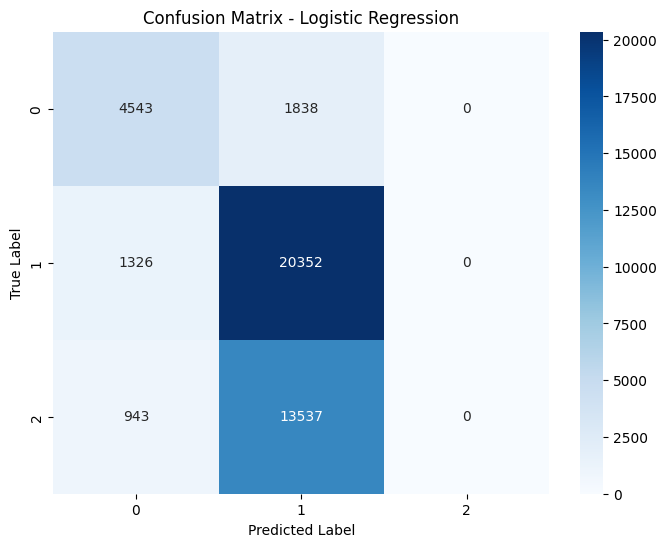


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      6381
           1       0.57      0.94      0.71     21678
           2       0.00      0.00      0.00     14480

    accuracy                           0.59     42539
   macro avg       0.41      0.55      0.47     42539
weighted avg       0.39      0.59      0.46     42539


Training Decision Tree...
Performance metrics for Decision Tree:
  - Accuracy: 0.5931
  - Precision: 0.5942
  - Recall: 0.5931
  - F1 Score: 0.5936


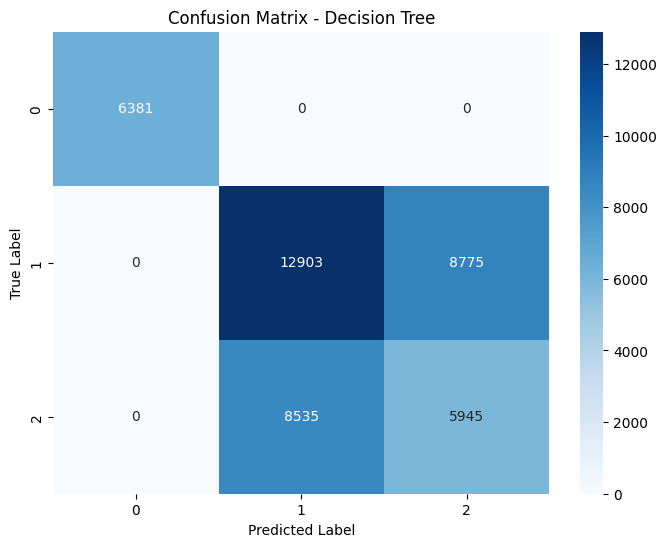


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       0.60      0.60      0.60     21678
           2       0.40      0.41      0.41     14480

    accuracy                           0.59     42539
   macro avg       0.67      0.67      0.67     42539
weighted avg       0.59      0.59      0.59     42539


Training Random Forest...
Performance metrics for Random Forest:
  - Accuracy: 0.6386
  - Precision: 0.5854
  - Recall: 0.6386
  - F1 Score: 0.5696


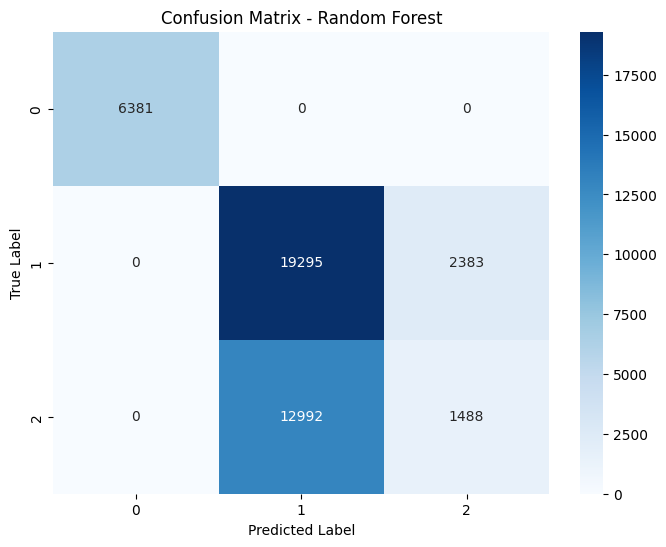


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       0.60      0.89      0.72     21678
           2       0.38      0.10      0.16     14480

    accuracy                           0.64     42539
   macro avg       0.66      0.66      0.63     42539
weighted avg       0.59      0.64      0.57     42539


Training XGBoost...
Performance metrics for XGBoost:
  - Accuracy: 0.6492
  - Precision: 0.5913
  - Recall: 0.6492
  - F1 Score: 0.5587


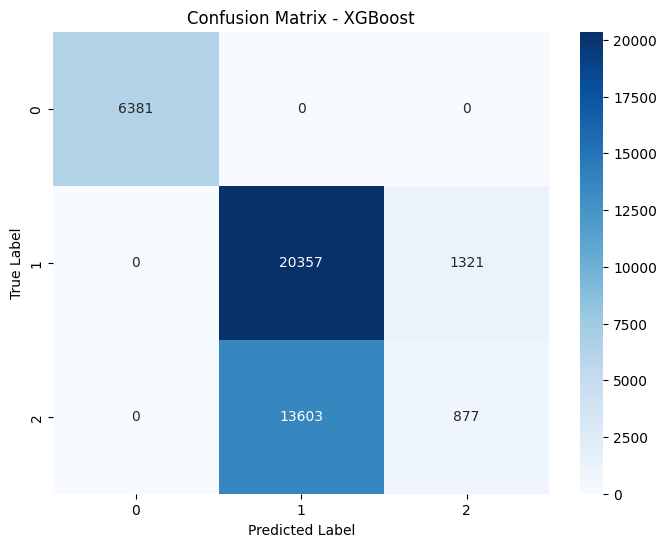


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       0.60      0.94      0.73     21678
           2       0.40      0.06      0.11     14480

    accuracy                           0.65     42539
   macro avg       0.67      0.67      0.61     42539
weighted avg       0.59      0.65      0.56     42539


Model Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
1,Decision Tree,0.593079,0.594196,0.593079,0.593619
2,Random Forest,0.638567,0.585393,0.638567,0.569619
3,XGBoost,0.649169,0.591297,0.649169,0.558712
0,Logistic Regression,0.585228,0.390336,0.585228,0.464650


<Figure size 1200x600 with 0 Axes>

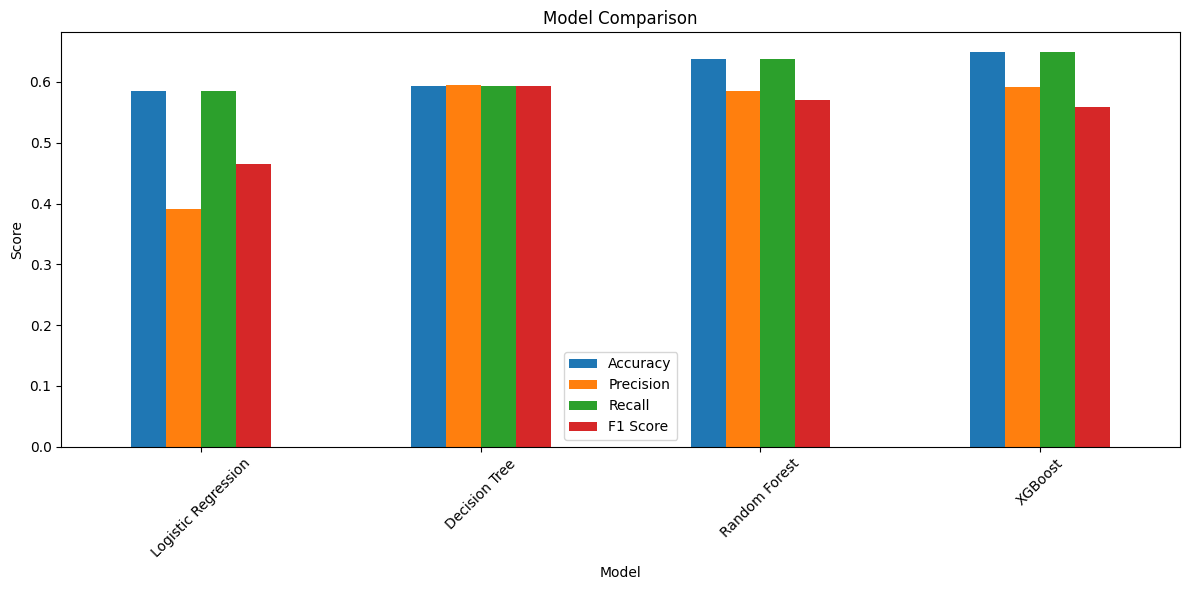


Best model: Decision Tree

--- Feature Importance Analysis ---

Top 10 important features:


,Feature,Importance
0,Feature_0,0.099583
4,Feature_4,0.094117
5,Feature_5,0.092656
2,Feature_2,0.092646
3,Feature_3,0.086049
1,Feature_1,0.074816
23,Feature_23,0.073945
36,Feature_36,0.069457
18,Feature_18,0.047975
28,Feature_28,0.041680


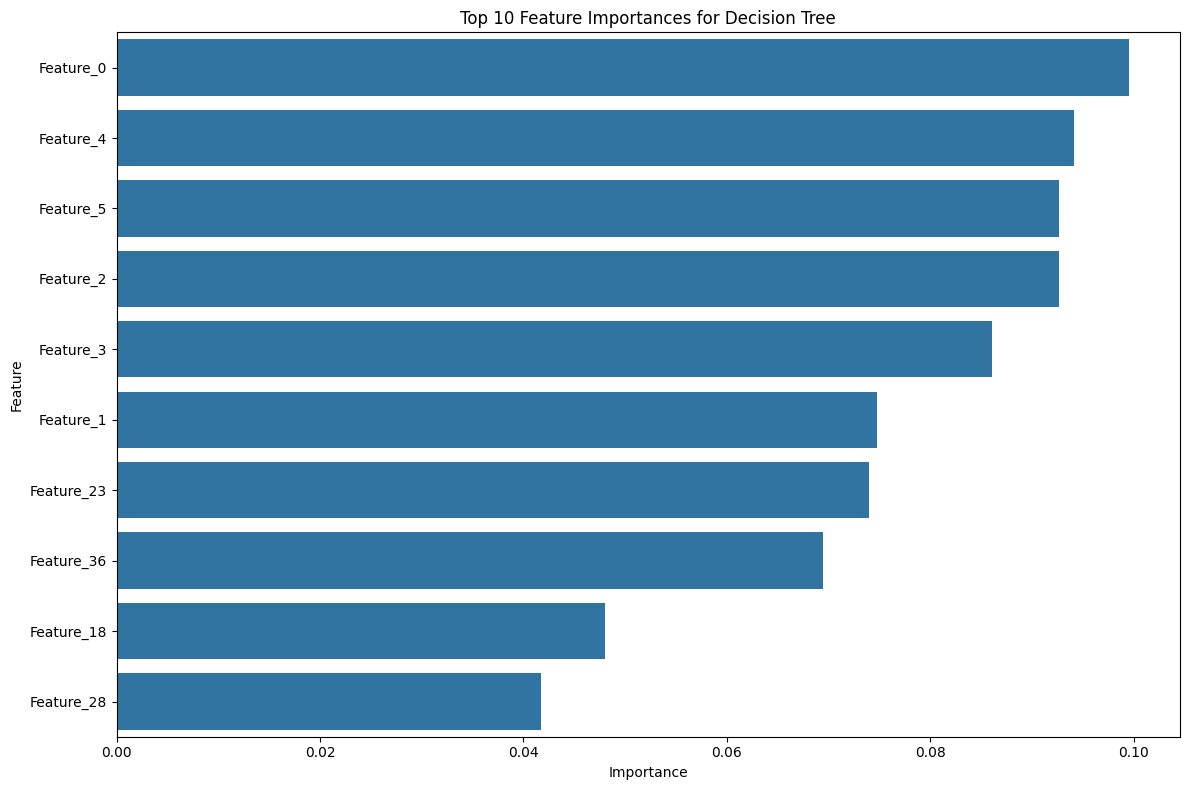


Analysis complete! You now have a working thyroid cancer risk prediction model.


In [ ]:
# Load the dataset from the specified path
file_path = "thyroid_cancer_risk_data.csv"

# Try reading with Excel first, if that fails, try CSV
try:
    df = pd.read_excel(file_path)
    print("Successfully loaded Excel file")
except Exception as e:
    print(f"Excel loading failed: {e}")
    try:
        df = pd.read_csv(file_path)
        print("Successfully loaded CSV file")
    except Exception as e2:
        print(f"CSV loading also failed: {e2}")
        print("Please check your file path and format")

# Display the first few rows to verify the data loaded correctly
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Data info and basic statistics
print("\nDataset Information:")
display(df.info())

print("\nBasic Statistics:")
display(df.describe())

print("\nMissing Values:")
missing_data = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100
})
display(missing_data[missing_data['Missing Values'] > 0])

# Data Preprocessing Function
def preprocess_data(df, target_col='Risk_Category'):
    print("\n--- Data Preprocessing ---")

    # Make a copy of the dataframe
    processed_df = df.copy()

    # Check if target column exists
    if target_col not in processed_df.columns:
        print(f"Warning: Target column '{target_col}' not found in dataset.")
        print(f"Available columns: {processed_df.columns.tolist()}")

        # Try to find a column that might be the target
        possible_targets = [col for col in processed_df.columns if 'risk' in col.lower() or 'category' in col.lower()]
        if possible_targets:
            target_col = possible_targets[0]
            print(f"Using '{target_col}' as the target column instead.")
        else:
            # If we can't find a likely target column, use the last column
            target_col = processed_df.columns[-1]
            print(f"Using last column '{target_col}' as the target column.")

    # Handle missing values
    print("\nHandling missing values...")
    for col in processed_df.columns:
        if processed_df[col].isnull().sum() > 0:
            if processed_df[col].dtype in ['int64', 'float64']:
                # For numerical columns, fill with median
                processed_df[col].fillna(processed_df[col].median(), inplace=True)
                print(f"  - Filled missing values in '{col}' with median")
            else:
                # For categorical columns, fill with mode
                processed_df[col].fillna(processed_df[col].mode()[0], inplace=True)
                print(f"  - Filled missing values in '{col}' with mode")

    # Convert target to numerical if it's categorical
    if processed_df[target_col].dtype == 'object':
        print(f"\nEncoding target variable '{target_col}'...")
        label_encoder = LabelEncoder()
        processed_df[target_col] = label_encoder.fit_transform(processed_df[target_col])
        print(f"Target classes: {label_encoder.classes_}")
        print(f"Encoded as: {np.unique(processed_df[target_col])}")

    # Split features and target
    X = processed_df.drop(target_col, axis=1)
    y = processed_df[target_col]

    # Identify numerical and categorical features
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    print(f"\nFeatures:")
    print(f"  - Numerical features: {numerical_features}")
    print(f"  - Categorical features: {categorical_features}")

    # Create preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'  # Include columns not specified in transformers
    )

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\nData split:")
    print(f"  - Training set: {X_train.shape[0]} samples")
    print(f"  - Test set: {X_test.shape[0]} samples")

    return X_train, X_test, y_train, y_test, preprocessor, numerical_features, categorical_features

# Train and Evaluate Models
def build_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor):
    print("\n--- Model Training and Evaluation ---")

    # Dictionary to store results
    results = {}

    # List of models to try
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier.XGBClassifier(random_state=42)
    }

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Create pipeline with preprocessing and model
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Make predictions
        y_pred = pipeline.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Print metrics
        print(f"Performance metrics for {name}:")
        print(f"  - Accuracy: {accuracy:.4f}")
        print(f"  - Precision: {precision:.4f}")
        print(f"  - Recall: {recall:.4f}")
        print(f"  - F1 Score: {f1:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # Classification Report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Store results
        results[name] = {
            'model': pipeline,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

    # Compare models
    print("\nModel Comparison:")
    model_comparison = pd.DataFrame({
        'Model': list(results.keys()),
        'Accuracy': [results[m]['accuracy'] for m in results],
        'Precision': [results[m]['precision'] for m in results],
        'Recall': [results[m]['recall'] for m in results],
        'F1 Score': [results[m]['f1'] for m in results]
    })
    display(model_comparison.sort_values('F1 Score', ascending=False))

    # Visualize comparison
    plt.figure(figsize=(12, 6))
    model_comparison.set_index('Model').plot(kind='bar', figsize=(12, 6))
    plt.title('Model Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Find best model
    best_model_name = model_comparison.loc[model_comparison['F1 Score'].idxmax(), 'Model']
    print(f"\nBest model: {best_model_name}")

    return results, best_model_name

# Analyze Feature Importance
def analyze_feature_importance(model_results, best_model_name, X_train, preprocessor, numerical_features, categorical_features):
    print("\n--- Feature Importance Analysis ---")

    # Get the best model
    best_model = model_results[best_model_name]['model']

    # Try to extract feature importance based on model type
    if best_model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        # Get the feature names after preprocessing
        feature_names = numerical_features.copy()

        # Add encoded categorical feature names
        for cat_feature in categorical_features:
            # For simplicity, just use the feature name
            feature_names.append(f"{cat_feature}_encoded")

        # Get feature importances from the model
        importances = best_model.named_steps['classifier'].feature_importances_

        # If number of features doesn't match, use generic names
        if len(importances) != len(feature_names):
            feature_names = [f"Feature_{i}" for i in range(len(importances))]

        # Create DataFrame with feature importances
        importance_df = pd.DataFrame({
            'Feature': feature_names[:len(importances)],
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        # Display feature importances
        print("\nTop 10 important features:")
        display(importance_df.head(10))

        # Plot feature importances
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
        plt.title(f'Top 10 Feature Importances for {best_model_name}')
        plt.tight_layout()
        plt.show()

        return importance_df
    else:
        print(f"Feature importance visualization not implemented for {best_model_name}")
        return None

# Run the Complete Pipeline
def run_pipeline():
    # Step 1: Preprocess the data
    X_train, X_test, y_train, y_test, preprocessor, numerical_features, categorical_features = preprocess_data(df)

    # Step 2: Build and evaluate models
    model_results, best_model_name = build_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor)

    # Step 3: Analyze feature importance
    importance_df = analyze_feature_importance(model_results, best_model_name, X_train, preprocessor, numerical_features, categorical_features)

    print("\n--- Pipeline Complete ---")
    print(f"Best model: {best_model_name}")
    print("The thyroid cancer risk assessment model has been successfully built and evaluated.")

    return model_results[best_model_name]['model']


# Step 1: Preprocess data
X_train, X_test, y_train, y_test, preprocessor, numerical_features, categorical_features = preprocess_data(df)

# Step 2: Build and evaluate models
model_results, best_model_name = build_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor)

# Step 3: Analyze feature importance
importance_df = analyze_feature_importance(model_results, best_model_name, X_train, preprocessor, numerical_features, categorical_features)

print("\nAnalysis complete! You now have a working thyroid cancer risk prediction model.")

In [ ]:
file_path = "thyroid_cancer_risk_data.csv"
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import xgboost as XGBClassifier

# Load the dataset
file_path = "thyroid_cancer_risk_data.csv"

try:
    df = pd.read_excel(file_path)
    print("Successfully loaded Excel file")
except Exception as e:
    print(f"Excel loading failed: {e}")
    try:
        df = pd.read_csv(file_path)
        print("Successfully loaded CSV file")
    except Exception as e2:
        print(f"CSV loading also failed: {e2}")
        print("Please check your file path and format")

print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
display(df.info())

print("\nBasic Statistics:")
display(df.describe())

print("\nMissing Values:")
missing_data = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100
})
display(missing_data[missing_data['Missing Values'] > 0])


# Preprocessing function
def preprocess_data(df, target_col='Risk_Category'):
    print("\n--- Data Preprocessing ---")
    processed_df = df.copy()

    if target_col not in processed_df.columns:
        print(f"Warning: Target column '{target_col}' not found.")
        possible_targets = [col for col in processed_df.columns if 'risk' in col.lower() or 'category' in col.lower()]
        if possible_targets:
            target_col = possible_targets[0]
            print(f"Using '{target_col}' as target column.")
        else:
            target_col = processed_df.columns[-1]
            print(f"Using last column '{target_col}' as target column.")

    # Handle missing values
    print("\nHandling missing values...")
    for col in processed_df.columns:
        if processed_df[col].isnull().sum() > 0:
            if processed_df[col].dtype in ['int64', 'float64']:
                processed_df[col].fillna(processed_df[col].median(), inplace=True)
                print(f"  - Filled missing values in '{col}' with median")
            else:
                processed_df[col].fillna(processed_df[col].mode()[0], inplace=True)
                print(f"  - Filled missing values in '{col}' with mode")

    # Encode target if needed
    if processed_df[target_col].dtype == 'object':
        print(f"\nEncoding target variable '{target_col}'...")
        label_encoder = LabelEncoder()
        processed_df[target_col] = label_encoder.fit_transform(processed_df[target_col])
        print(f"Classes: {label_encoder.classes_}")

    X = processed_df.drop(target_col, axis=1)
    y = processed_df[target_col]

    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    print(f"\nFeatures:")
    print(f"  - Numerical: {numerical_features}")
    print(f"  - Categorical: {categorical_features}")

    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

    # 60% Train, 20% Val, 20% Test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    print("\nData Split:")
    print(f"  - Train: {X_train.shape[0]} samples")
    print(f"  - Validation: {X_val.shape[0]} samples")
    print(f"  - Test: {X_test.shape[0]} samples")

    return X_train, X_val, X_test, y_train, y_val, y_test, preprocessor, numerical_features, categorical_features


# Model building and evaluation
def build_and_evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test, preprocessor):
    print("\n--- Model Training and Evaluation ---")
    results = {}

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier.XGBClassifier(random_state=42)
    }

    for name, model in models.items():
        print(f"\nTraining {name}...")
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"Metrics for {name}:")
        print(f"  - Accuracy: {accuracy:.4f}")
        print(f"  - Precision: {precision:.4f}")
        print(f"  - Recall: {recall:.4f}")
        print(f"  - F1 Score: {f1:.4f}")

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        results[name] = {
            'model': pipeline,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

    print("\nModel Comparison:")
    model_comparison = pd.DataFrame({
        'Model': list(results.keys()),
        'Accuracy': [results[m]['accuracy'] for m in results],
        'Precision': [results[m]['precision'] for m in results],
        'Recall': [results[m]['recall'] for m in results],
        'F1 Score': [results[m]['f1'] for m in results]
    })
    display(model_comparison.sort_values('F1 Score', ascending=False))

    plt.figure(figsize=(12, 6))
    model_comparison.set_index('Model').plot(kind='bar', figsize=(12, 6))
    plt.title('Model Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    best_model_name = model_comparison.loc[model_comparison['F1 Score'].idxmax(), 'Model']
    print(f"\nBest Model: {best_model_name}")

    return results, best_model_name


# Feature Importance
def analyze_feature_importance(model_results, best_model_name, X_train, preprocessor, numerical_features, categorical_features):
    print("\n--- Feature Importance ---")
    best_model = model_results[best_model_name]['model']

    if best_model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        feature_names = numerical_features.copy()
        for cat in categorical_features:
            feature_names.append(f"{cat}_encoded")

        importances = best_model.named_steps['classifier'].feature_importances_
        if len(importances) != len(feature_names):
            feature_names = [f"Feature_{i}" for i in range(len(importances))]

        importance_df = pd.DataFrame({
            'Feature': feature_names[:len(importances)],
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        print("\nTop 10 Important Features:")
        display(importance_df.head(10))

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
        plt.title(f'Top 10 Feature Importances for {best_model_name}')
        plt.tight_layout()
        plt.show()

        return importance_df
    else:
        print(f"Feature importance not available for {best_model_name}")
        return None




Excel loading failed: Excel file format cannot be determined, you must specify an engine manually.
Successfully loaded CSV file

First 5 rows of the dataset:


,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64


None


Basic Statistics:


,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000



Missing Values:


,Missing Values,Percentage



--- Data Preprocessing ---
Using 'Thyroid_Cancer_Risk' as target column.

Handling missing values...

Encoding target variable 'Thyroid_Cancer_Risk'...
Classes: ['High' 'Low' 'Medium']

Features:
  - Numerical: ['Patient_ID', 'Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
  - Categorical: ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Diagnosis']

Data Split:
  - Train: 127614 samples
  - Validation: 42538 samples
  - Test: 42539 samples

--- Model Training and Evaluation ---

Training Logistic Regression...
Metrics for Logistic Regression:
  - Accuracy: 0.5857
  - Precision: 0.3908
  - Recall: 0.5857
  - F1 Score: 0.4651


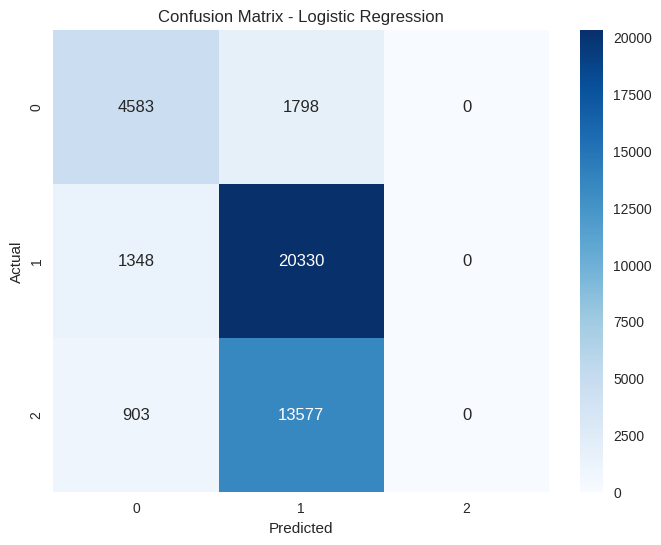


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      6381
           1       0.57      0.94      0.71     21678
           2       0.00      0.00      0.00     14480

    accuracy                           0.59     42539
   macro avg       0.41      0.55      0.47     42539
weighted avg       0.39      0.59      0.47     42539


Training Decision Tree...
Metrics for Decision Tree:
  - Accuracy: 0.5894
  - Precision: 0.5909
  - Recall: 0.5894
  - F1 Score: 0.5901


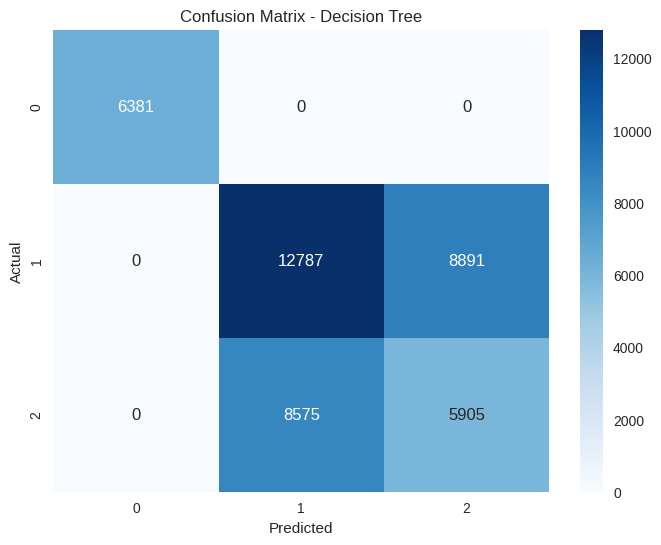


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       0.60      0.59      0.59     21678
           2       0.40      0.41      0.40     14480

    accuracy                           0.59     42539
   macro avg       0.67      0.67      0.67     42539
weighted avg       0.59      0.59      0.59     42539


Training Random Forest...
Metrics for Random Forest:
  - Accuracy: 0.6405
  - Precision: 0.5902
  - Recall: 0.6405
  - F1 Score: 0.5725


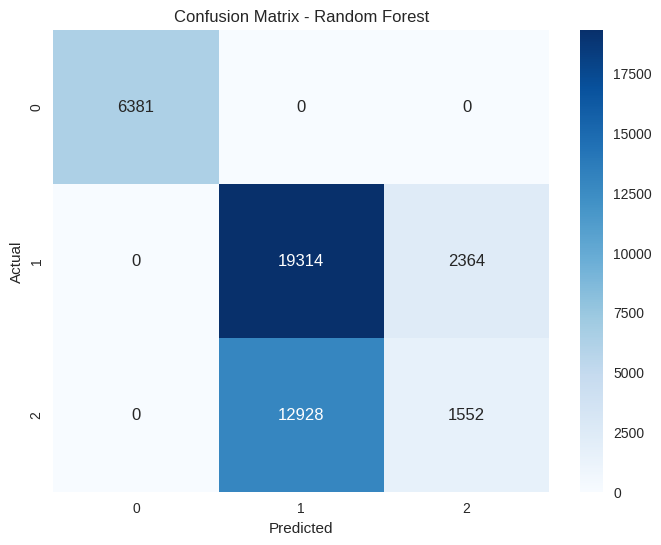


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       0.60      0.89      0.72     21678
           2       0.40      0.11      0.17     14480

    accuracy                           0.64     42539
   macro avg       0.67      0.67      0.63     42539
weighted avg       0.59      0.64      0.57     42539


Training XGBoost...
Metrics for XGBoost:
  - Accuracy: 0.6439
  - Precision: 0.5843
  - Recall: 0.6439
  - F1 Score: 0.5614


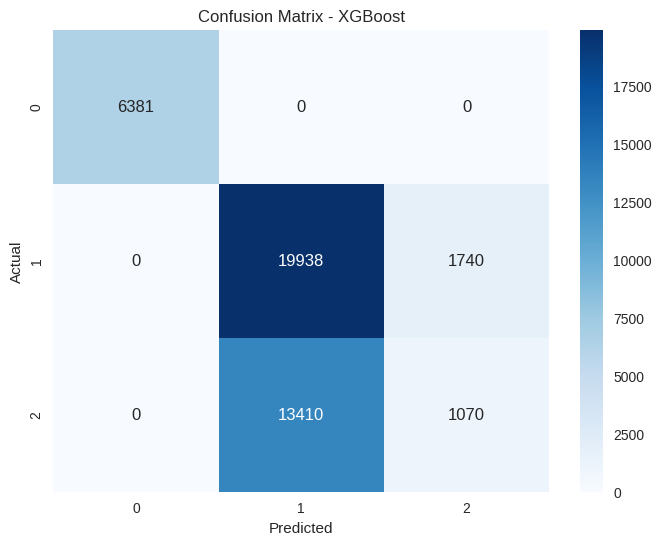


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       0.60      0.92      0.72     21678
           2       0.38      0.07      0.12     14480

    accuracy                           0.64     42539
   macro avg       0.66      0.66      0.62     42539
weighted avg       0.58      0.64      0.56     42539


Model Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
1,Decision Tree,0.589412,0.590894,0.589412,0.590121
2,Random Forest,0.640518,0.590178,0.640518,0.572516
3,XGBoost,0.643856,0.584299,0.643856,0.561431
0,Logistic Regression,0.585651,0.390757,0.585651,0.465134


<Figure size 1200x600 with 0 Axes>

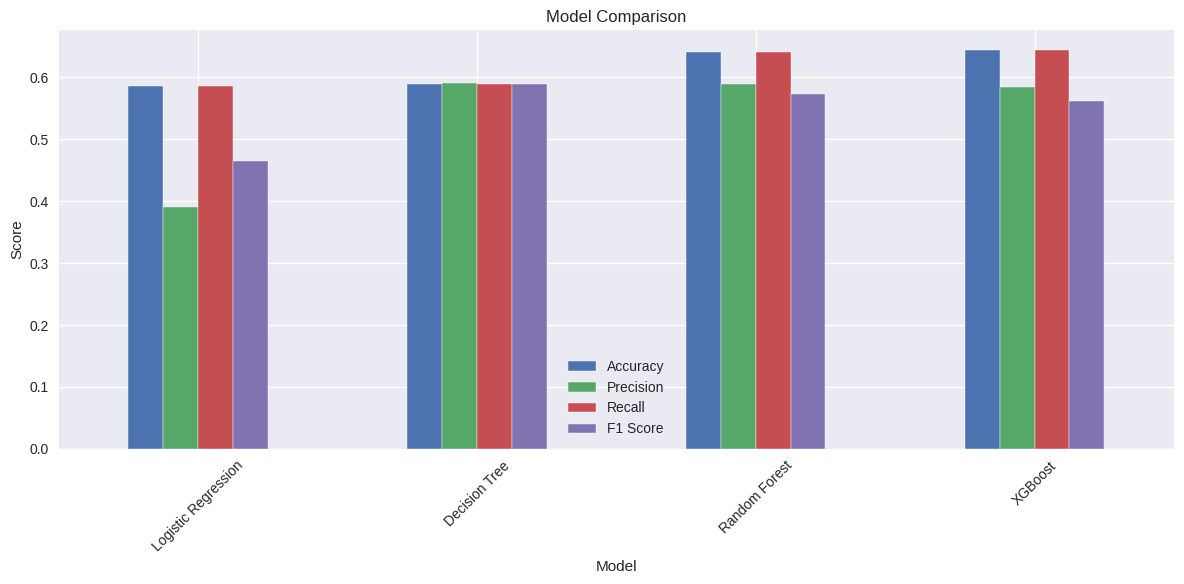


Best Model: Decision Tree

--- Feature Importance ---

Top 10 Important Features:


,Feature,Importance
0,Feature_0,0.101351
4,Feature_4,0.097200
2,Feature_2,0.095050
5,Feature_5,0.091070
3,Feature_3,0.087416
1,Feature_1,0.077120
24,Feature_24,0.072570
36,Feature_36,0.069156
18,Feature_18,0.043688
28,Feature_28,0.036078


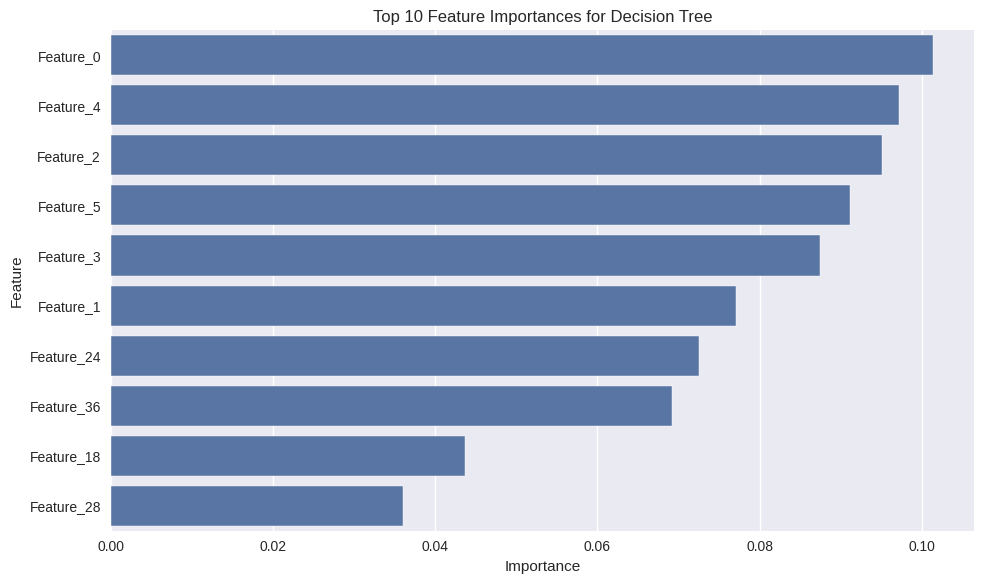


--- Pipeline Complete ---


In [ ]:
# Run pipeline
def run_pipeline():
    X_train, X_val, X_test, y_train, y_val, y_test, preprocessor, numerical_features, categorical_features = preprocess_data(df)
    model_results, best_model_name = build_and_evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test, preprocessor)
    importance_df = analyze_feature_importance(model_results, best_model_name, X_train, preprocessor, numerical_features, categorical_features)
    print("\n--- Pipeline Complete ---")
    return model_results[best_model_name]['model']


# Execute
best_model = run_pipeline()

In [ ]:
!pip install gradio pandas scikit-learn matplotlib seaborn xgboost openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 138.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import OneHotEncoder
import io
import base64

# Load your dataset
try:
    file_path = "thyroid_cancer_risk_data.csv"
    df = pd.read_csv(file_path)
    print("Successfully loaded data from:", file_path)
except Exception as e:
    print(f"Error loading data: {e}")
    # Create mock data if real data isn't available
    np.random.seed(42)
    n = 500
    data = {
        'Age': np.random.randint(20, 80, n),
        'Gender': np.random.choice(['Male', 'Female'], n),
        'TSH_Level': np.random.normal(2.5, 1.5, n),
        'T3_Level': np.random.normal(1.2, 0.3, n),
        'T4_Level': np.random.normal(1.2, 0.3, n),
        'Nodule_Size': np.random.normal(1.0, 0.8, n),
        'Family_History': np.random.choice(['Yes', 'No'], n),
        'Radiation_Exposure': np.random.choice(['Yes', 'No'], n),
        'Iodine_Deficiency': np.random.choice(['Yes', 'No'], n),
        'Thyroid_Cancer_Risk': np.random.choice(['Low', 'Medium', 'High'], n, p=[0.6, 0.3, 0.1])
    }
    df = pd.DataFrame(data)

# Data preprocessing function
def preprocess_data(df, target_col='Thyroid_Cancer_Risk'):
    processed_df = df.copy()

    # Handle missing values
    for col in processed_df.columns:
        if processed_df[col].isnull().sum() > 0:
            if processed_df[col].dtype in ['int64', 'float64']:
                processed_df[col].fillna(processed_df[col].median(), inplace=True)
            else:
                processed_df[col].fillna(processed_df[col].mode()[0], inplace=True)

    # Convert target to numerical if it's categorical
    if processed_df[target_col].dtype == 'object':
        label_encoder = LabelEncoder()
        processed_df[target_col] = label_encoder.fit_transform(processed_df[target_col])
        target_classes = label_encoder.classes_
    else:
        target_classes = [f"Class {i}" for i in np.unique(processed_df[target_col])]

    # Split features and target
    X = processed_df.drop(target_col, axis=1)
    y = processed_df[target_col]

    # Identify numerical and categorical features
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # Create preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    return X_train, X_test, y_train, y_test, preprocessor, numerical_features, categorical_features, target_classes

# Train models function
def train_models(X_train, X_test, y_train, y_test, preprocessor):
    results = {}

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': xgb.XGBClassifier(random_state=42, objective='multi:softprob')
    }

    for name, model in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[name] = {
            'model': pipeline,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'y_test': y_test,
            'y_pred': y_pred
        }

    model_comparison = pd.DataFrame({
        'Model': list(results.keys()),
        'Accuracy': [results[m]['accuracy'] for m in results],
        'Precision': [results[m]['precision'] for m in results],
        'Recall': [results[m]['recall'] for m in results],
        'F1 Score': [results[m]['f1'] for m in results]
    })

    best_model_name = model_comparison.loc[model_comparison['F1 Score'].idxmax(), 'Model']

    return results, best_model_name, model_comparison

# Feature importance analysis
def get_feature_importance(model_results, best_model_name, numerical_features, categorical_features):
    best_model = model_results[best_model_name]['model']

    if best_model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        try:
            importances = best_model.named_steps['classifier'].feature_importances_
            feature_names = numerical_features.copy()

            # Get one-hot encoded feature names
            encoder = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
            cat_feature_names = encoder.get_feature_names_out(categorical_features)
            feature_names.extend(cat_feature_names)

            importance_df = pd.DataFrame({
                'Feature': feature_names[:len(importances)],
                'Importance': importances
            }).sort_values('Importance', ascending=False)

            return importance_df
        except Exception as e:
            print(f"Error getting feature importance: {e}")
            return pd.DataFrame({'Feature': ['Not available'], 'Importance': [0]})
    else:
        try:
            coef = best_model.named_steps['classifier'].coef_[0]
            feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': np.abs(coef)
            }).sort_values('Importance', ascending=False)

            return importance_df
        except:
            return pd.DataFrame({'Feature': ['Not available'], 'Importance': [0]})

# Plot functions that return base64 encoded images
def create_confusion_matrix_plot(y_test, y_pred, target_classes):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)

    if len(target_classes) != cm.shape[0]:
        labels = [f"Class {i}" for i in range(cm.shape[0])]
    else:
        labels = target_classes

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode('utf-8')

def create_feature_importance_plot(importance_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode('utf-8')

def create_model_comparison_plot(model_comparison):
    plt.figure(figsize=(12, 6))
    model_comparison.set_index('Model').plot(kind='bar', figsize=(12, 6))
    plt.title('Model Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode('utf-8')

def create_distribution_plot(df, target_column):
    plt.figure(figsize=(8, 6))
    df[target_column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {target_column}')
    plt.xlabel(target_column)
    plt.ylabel('Count')
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode('utf-8')

# Preprocess and train models
X_train, X_test, y_train, y_test, preprocessor, numerical_features, categorical_features, target_classes = preprocess_data(df)
target_column = 'Thyroid_Cancer_Risk'
model_results, best_model_name, model_comparison = train_models(X_train, X_test, y_train, y_test, preprocessor)
importance_df = get_feature_importance(model_results, best_model_name, numerical_features, categorical_features)
best_model = model_results[best_model_name]['model']

# Create plots
confusion_matrix_img = create_confusion_matrix_plot(
    model_results[best_model_name]['y_test'],
    model_results[best_model_name]['y_pred'],
    target_classes
)
feature_importance_img = create_feature_importance_plot(importance_df)
model_comparison_img = create_model_comparison_plot(model_comparison)
distribution_img = create_distribution_plot(df, target_column)

# Prediction function
def predict_risk(*args):
    features = list(X_train.columns)
    input_dict = {features[i]: [args[i]] for i in range(len(features))}
    input_data = pd.DataFrame(input_dict)

    prediction = best_model.predict(input_data)
    prediction_proba = best_model.predict_proba(input_data)

    predicted_class = target_classes[prediction[0]]

    risk_probs = {
        target_classes[i]: f"{prediction_proba[0][i]*100:.2f}%"
        for i in range(len(target_classes))
    }

    # Get top 3 important features for this prediction if available
    if best_model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        try:
            importances = best_model.named_steps['classifier'].feature_importances_
            feature_names = numerical_features.copy()

            encoder = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
            cat_feature_names = encoder.get_feature_names_out(categorical_features)
            feature_names.extend(cat_feature_names)

            sorted_idx = importances.argsort()[::-1]
            top_features = [feature_names[i] for i in sorted_idx[:3] if i < len(feature_names)]
            key_factors = f"Top factors: {', '.join(top_features)}"
        except:
            key_factors = "Key factors not available for this prediction"
    else:
        key_factors = "Key factors not available for this model type"

    risk_summary = f"Predicted {target_column}: {predicted_class}\n\n"
    risk_summary += "Prediction Probabilities:\n"
    for risk_class, prob in risk_probs.items():
        risk_summary += f"- {risk_class}: {prob}\n"
    risk_summary += f"\n{key_factors}"

    return risk_summary

# Create Gradio interface
with gr.Blocks(title="Thyroid Cancer Risk Prediction") as app:
    gr.Markdown("# Thyroid Cancer Risk Prediction Model")
    gr.Markdown(f"Predicting: **{target_column}**")
    gr.Markdown(f"Best performing model: **{best_model_name}** (F1 Score: {model_results[best_model_name]['f1']:.4f})")

    with gr.Tabs():
        with gr.TabItem("Make Prediction"):
            gr.Markdown("## Enter Patient Information")

            input_components = []
            features = list(X_train.columns)
            mid_point = len(features) // 2

            with gr.Row():
                with gr.Column():
                    for i, feature in enumerate(features[:mid_point]):
                        if feature in numerical_features:
                            min_val = float(df[feature].min())
                            max_val = float(df[feature].max())
                            default_val = float(df[feature].median())

                            min_val = round(min_val, 2)
                            max_val = round(max_val, 2)
                            default_val = round(default_val, 2)

                            if min_val == max_val:
                                min_val = max(0, min_val - 1)
                                max_val = max_val + 1

                            input_components.append(gr.Slider(
                                min_val, max_val, value=default_val, label=feature
                            ))
                        else:
                            unique_values = df[feature].unique().tolist()
                            default_val = df[feature].mode()[0]
                            input_components.append(gr.Radio(
                                unique_values, label=feature, value=default_val
                            ))

                with gr.Column():
                    for i, feature in enumerate(features[mid_point:]):
                        if feature in numerical_features:
                            min_val = float(df[feature].min())
                            max_val = float(df[feature].max())
                            default_val = float(df[feature].median())

                            min_val = round(min_val, 2)
                            max_val = round(max_val, 2)
                            default_val = round(default_val, 2)

                            if min_val == max_val:
                                min_val = max(0, min_val - 1)
                                max_val = max_val + 1

                            input_components.append(gr.Slider(
                                min_val, max_val, value=default_val, label=feature
                            ))
                        else:
                            unique_values = df[feature].unique().tolist()
                            default_val = df[feature].mode()[0]
                            input_components.append(gr.Radio(
                                unique_values, label=feature, value=default_val
                            ))

            predict_btn = gr.Button(f"Predict {target_column}")

            with gr.Row():
                with gr.Column():
                    output = gr.Textbox(label="Risk Assessment Results", lines=10)

            predict_btn.click(
                fn=predict_risk,
                inputs=input_components,
                outputs=output
            )

        with gr.TabItem("Model Performance"):
            gr.Markdown("## Model Evaluation Results")

            with gr.Row():
                with gr.Column():
                    gr.Markdown("### Model Comparison")
                    gr.HTML(f"<img src='data:image/png;base64,{model_comparison_img}' style='max-width:100%;'>")

                with gr.Column():
                    gr.Markdown("### Confusion Matrix")
                    gr.HTML(f"<img src='data:image/png;base64,{confusion_matrix_img}' style='max-width:100%;'>")

            with gr.Row():
                with gr.Column():
                    gr.Markdown("### Feature Importance")
                    gr.HTML(f"<img src='data:image/png;base64,{feature_importance_img}' style='max-width:100%;'>")

                with gr.Column():
                    gr.Markdown("### Metrics for Best Model")
                    metrics_md = f"""
                    | Metric | Value |
                    | ------ | ----- |
                    | Accuracy | {model_results[best_model_name]['accuracy']:.4f} |
                    | Precision | {model_results[best_model_name]['precision']:.4f} |
                    | Recall | {model_results[best_model_name]['recall']:.4f} |
                    | F1 Score | {model_results[best_model_name]['f1']:.4f} |
                    """
                    gr.Markdown(metrics_md)

        with gr.TabItem("Data Overview"):
            gr.Markdown("## Dataset Information")

            with gr.Row():
                with gr.Column():
                    gr.Markdown("### Data Sample")
                    gr.DataFrame(df.head())

                with gr.Column():
                    gr.Markdown("### Data Statistics")
                    stats_md = f"""
                    - **Number of samples**: {len(df)}
                    - **Number of features**: {len(df.columns) - 1}
                    - **Target variable**: {target_column}
                    - **Target Classes**: {', '.join(map(str, target_classes))}
                    - **Numerical features**: {', '.join(numerical_features)}
                    - **Categorical features**: {', '.join(categorical_features)}
                    """
                    gr.Markdown(stats_md)

            with gr.Row():
                with gr.Column():
                    gr.Markdown("### Data Distribution")
                    gr.HTML(f"<img src='data:image/png;base64,{distribution_img}' style='max-width:100%;'>")

# Launch the app
app.launch()

Successfully loaded data from: /content/drive/MyDrive/aditya_r_data/thyroid_cancer_risk_data.csv


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://de8920336a91ff6388.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<Figure size 1200x600 with 0 Axes>